In [3]:
What_were_covering = {1: "data preparation",
                      2: "Build Model",
                      3: "fit the model",
                      4: "Evaluate model",
                      5: "saving and loading model",
                      6: "putting all it together"}
What_were_covering


{1: 'data preparation',
 2: 'Build Model',
 3: 'fit the model',
 4: 'Evaluate model',
 5: 'saving and loading model',
 6: 'putting all it together'}

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu117'

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
# data Preparation
weight = 0.7
bias = 0.3

#create

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X), len(y)


(50, 50)

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [9]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [10]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

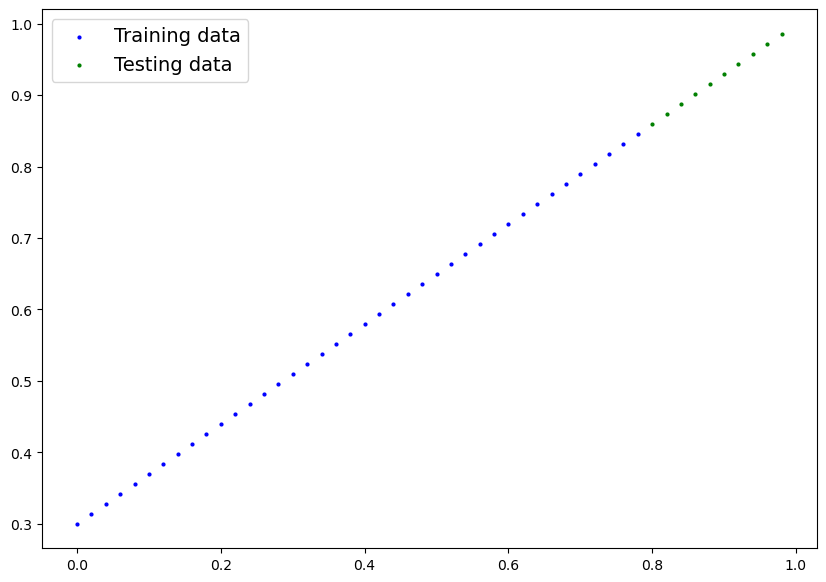

In [11]:
plot_predictions()

In [12]:
#My first pytorch model.
# linear Regression model class ((NN.module))
# from torch import nn

# class LinearRegressionModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.weights = nn.Parameter(torch.randn(1, require_grad=True, dtype=torch.float32))
#         self.bias = nn.Parameter(torch.randn(1, require_grad=True, dtype=torch.float32))
#         def forward(self, x: torch.Tensor) -> torch.Tensor:
#             return self.weights * x + self.bias

In [13]:
import torch
import torch.nn as nn

In [14]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x:torch.Tensor)-> torch.Tensor:
        return self.weights * x + self.bias
        

In [15]:
### Pytorch model building Essentials

# * torch.nn contains alll buildings for computational graphs 
# * torch.nn .parameters -- what parameters should pour model try and learn.
# * torch.nn.Module -- base class for all neural netwiork modules you should overrite forward()
# * torch.optim -- xoptimizers in pytorchg.
# * def forward() -- ALL nnModule subclasses require you to ovverite forward() method.
# 

In [16]:
# create a random seed.
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# List named Parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
weight, bias

(0.7, 0.3)

In [20]:
# torch.inference
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

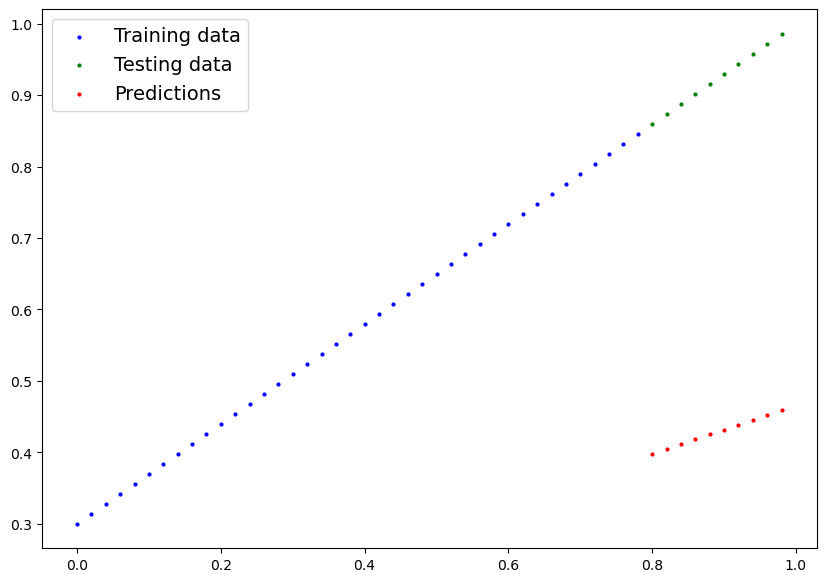

In [21]:
plot_predictions(predictions=y_preds)

In [63]:
#setup a loss function
loss_fn = nn.L1Loss()





#setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr=0.001)

In [64]:
epochs = 90 
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    #perform back propagration on ;loss wrt parameters of model.
    loss.backward()
    
    optimizer.step()
#     model_0.eval()
    

In [65]:
model_0.eval()
preds = model_0(X_test)
preds

tensor([[0.8588],
        [0.8727],
        [0.8867],
        [0.9007],
        [0.9147],
        [0.9287],
        [0.9426],
        [0.9566],
        [0.9706],
        [0.9846]], grad_fn=<AddBackward0>)

In [66]:
with torch.no_grad():
    preds = model_0(X_test)
preds

tensor([[0.8588],
        [0.8727],
        [0.8867],
        [0.9007],
        [0.9147],
        [0.9287],
        [0.9426],
        [0.9566],
        [0.9706],
        [0.9846]])

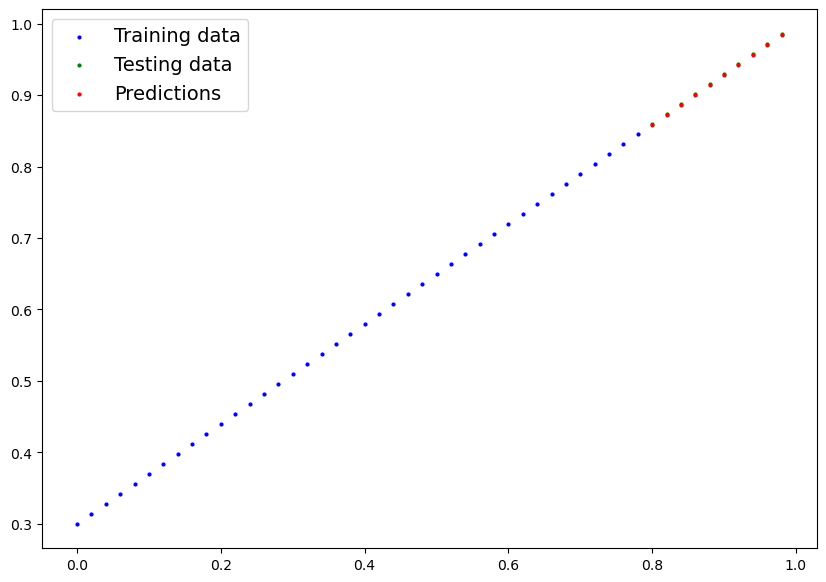

In [67]:
plot_predictions(predictions=preds)